In [1]:
import geopandas
import numpy as np
import pandas as pd
import bokeh
from bokeh.models import ColumnDataSource, HoverTool, Legend, Span, Tabs, Text, Title
from bokeh.plotting import figure, output_notebook, show
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import rasterio

# Philippines Population

This notebook plots the foundational dataset for Philippines, its population, from two sources - Meta's High Resolution Population Layer and WorldPop. 

The shapefiles are obtained from HdX.

In [2]:
PHILIPPINES_ADM0 = geopandas.read_file('../../data/shapefiles/Philippines/phl_adminboundaries_candidate_exclude_adm3/phl_admbnda_adm0_singlepart_psa_namria_itos_20200529.shp')
PHILIPPINES_ADM1 = geopandas.read_file('../../data/shapefiles/Philippines/phl_adminboundaries_candidate_exclude_adm3/phl_admbnda_adm1_psa_namria_20200529.shp')
PHILIPPINES_ADM2 = geopandas.read_file('../../data/shapefiles/Philippines/phl_adminboundaries_candidate_exclude_adm3/phl_admbnda_adm2_psa_namria_20200529.shp')

In [12]:
PHILIPPINES_ADM0.plot()

In [4]:
worldpop=rasterio.open('../../data/population/phl_ppp_2020.tif')

In [6]:
meta = pd.read_csv('../../data/population/phl_general_2020.csv')

In [8]:
meta = geopandas.GeoDataFrame(
    meta, geometry=geopandas.points_from_xy(meta.longitude, meta.latitude), crs="EPSG:4326"
)

In [10]:
PHPopulationAdm2 = PHILIPPINES_ADM2.sjoin(meta)

In [14]:
PHPopulationAdm1 = PHILIPPINES_ADM1.sjoin(meta)

MemoryError: Unable to allocate 508. MiB for an array with shape (7, 9512020) and data type object

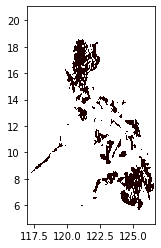

In [ ]:
from rasterio.plot import show

fig, ax = plt.subplots()

extent = [worldpop.bounds[0], worldpop.bounds[2], worldpop.bounds[1], worldpop.bounds[3]]
ax = rasterio.plot.show(worldpop, extent=extent, ax=ax, cmap="pink")


In [ ]:
worldpop.crs

CRS.from_epsg(4326)

In [ ]:
rds = rioxarray.open_rasterio(path+'phl_ppp_2020.tif')
rds.name = "data"
df = rds.squeeze().to_dataframe().reset_index()
geometry = gpd.points_from_xy(df.x, df.y)
gdf = gpd.GeoDataFrame(df, crs=rds.rio.crs, geometry=geometry)

NameError: name 'rioxarray' is not defined

In [ ]:
pop_by_town=worldpop.sjoin(geo_phil,how="inner")

AttributeError: 'DatasetReader' object has no attribute 'sjoin'

In [ ]:
treecover=rasterio.open(path+'Hansen_GFC-2022-v1.10_treecover2000_20N_120E.tif')
treecover.crs

CRS.from_epsg(4326)

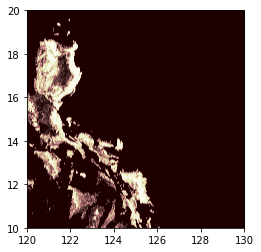

In [ ]:
from rasterio.plot import show

fig, ax = plt.subplots()

extent = [treecover.bounds[0], treecover.bounds[2], treecover.bounds[1], treecover.bounds[3]]
ax = rasterio.plot.show(treecover, extent=extent, ax=ax, cmap="pink")



In [ ]:
pop = geopandas.read_file(path+'phl_general_2020.csv')
pop.head

In [ ]:
print(type(pop.longitude[2]))

In [ ]:
pop.plot()
x=pop.latitude
y=pop.longitude
print(x,y)
plt.scatter(x, y)
plt.show()

In [ ]:
pop.crs="EPSG:3121"

In [ ]:
pop.head

In [ ]:
geo_phil=geo_phil.to_crs(pop.crs)

In [ ]:
geo_phil.crs

In [ ]:
pop_by_town=pop.sjoin(geo_phil,how="inner")
pop_by_town.head